### **MODELAMIENTO ARBOL DE DESICIÓN**

**PASO 1:** Separar el conjunto de datos en las características (X) y la variable objetivo (y).

In [3]:
import pandas as pd

# Cargar tus datos desde un archivo CSV u otra fuente
data = pd.read_csv("datos_listos.csv")

# Separar las características (X) y la variable objetivo (y)
X = data.drop('HOSPITALIZACION', axis=1)
y = data['HOSPITALIZACION']

**PASO 2:** Dividir el conjunto de datos en conjuntos de entrenamiento (train) y prueba (test).

In [4]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**PASO 3:** Instanciar y entrenar un modelo de Árbol de Decisión con una profundidad máxima arbitraria. 
- Profundidad = 5

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar el modelo de Árbol de Decisión con profundidad máxima 5
modelo_arbol = DecisionTreeClassifier(max_depth=5)

# Entrenar el modelo con los datos de entrenamiento
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

**PASO 4:** Realizar predicciones utilizando el modelo entrenado en los datos de prueba.

In [6]:
# Realizar predicciones en los datos de prueba
y_pred = modelo_arbol.predict(X_test)

**PASO 5:** Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización.

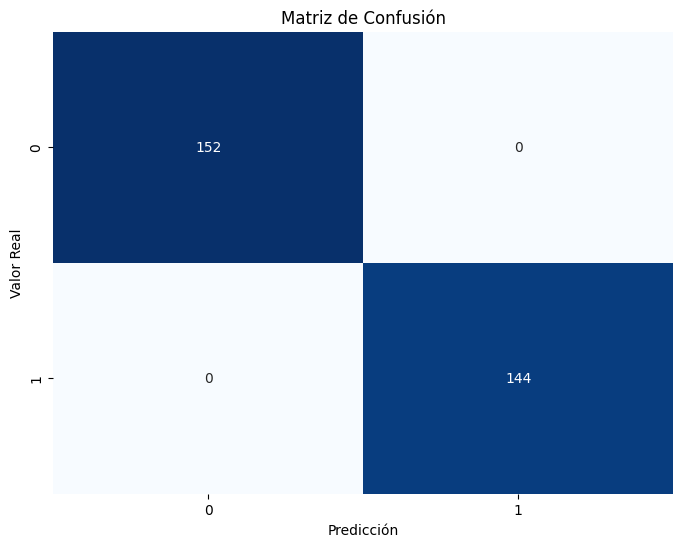

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Crear una gráfica de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

**PASO 6:** Seleccione métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.
- Presición
- Recall
- F1 Score
- Accuracy

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular las métricas de rendimiento
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Exactitud: {accuracy}')

Precisión: 1.0
Recall: 1.0
F1-Score: 1.0
Exactitud: 1.0


***Adicional:*** Curvas ROC y AUC; porque la clasificación es binaria (ROC) Y para evaluar el rendimiento del modelo en diferentes umbrales de clasificación (AUC).

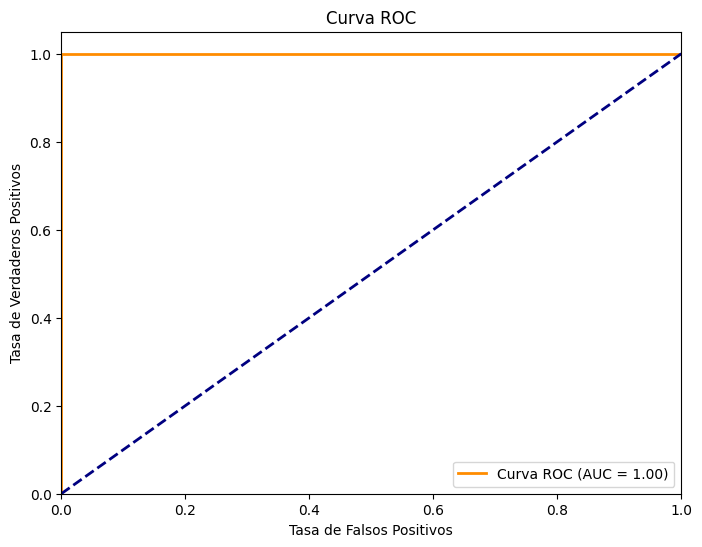

In [9]:
from sklearn.metrics import roc_curve, auc

# Calcular la probabilidad de las predicciones
y_prob = modelo_arbol.predict_proba(X_test)[:, 1]

# Calcular la Curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Visualizar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

**PASO 7:** Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo.

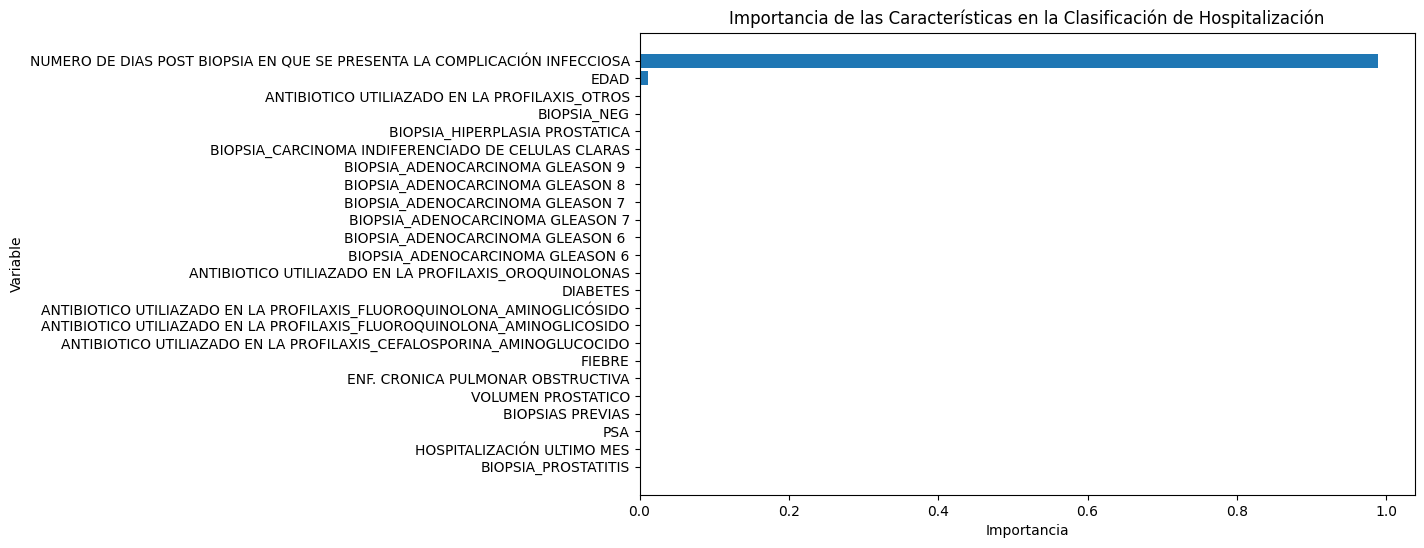

In [10]:
# Obtener la importancia de las características desde el modelo
importancia_caracteristicas = modelo_arbol.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importancia_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importancia_caracteristicas})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las características en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Variable'], importancia_df['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características en la Clasificación de Hospitalización')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

**PASO 8:** Encuentre cuál sería un valor óptimo para el hiperparámetro max_depth para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria.

In [11]:
from sklearn.model_selection import GridSearchCV

# Definir los valores de max_depth a probar en la búsqueda en cuadrícula
parametros = {'max_depth': [3, 5, 7, 10, 15]}

# Instanciar el modelo de Árbol de Decisión
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Realizar la búsqueda en cuadrícula con validación cruzada (5-folds)
grid_search = GridSearchCV(modelo_arbol, parametros, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de max_depth
mejor_max_depth = grid_search.best_params_['max_depth']
print(f"Mejor valor de max_depth: {mejor_max_depth}")

# Entrenar un modelo de Árbol de Decisión con el mejor valor de max_depth
modelo_arbol_optimo = DecisionTreeClassifier(max_depth=mejor_max_depth, random_state=42)
modelo_arbol_optimo.fit(X_train, y_train)

# Realizar predicciones con el modelo óptimo
y_pred_optimo = modelo_arbol_optimo.predict(X_test)

# Calcular y comparar las métricas de evaluación entre los modelos
precision_optimo = precision_score(y_test, y_pred_optimo)
recall_optimo = recall_score(y_test, y_pred_optimo)
f1_optimo = f1_score(y_test, y_pred_optimo)
accuracy_optimo = accuracy_score(y_test, y_pred_optimo)

print("Métricas para el modelo con mejor max_depth:")
print(f'Precisión: {precision_optimo}')
print(f'Recall: {recall_optimo}')
print(f'F1-Score: {f1_optimo}')
print(f'Exactitud: {accuracy_optimo}')


Mejor valor de max_depth: 3
Métricas para el modelo con mejor max_depth:
Precisión: 1.0
Recall: 1.0
F1-Score: 1.0
Exactitud: 1.0


**PASO 9:** Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)

# Instanciar el modelo de KNN con k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo de KNN
knn_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_knn = knn_model.predict(X_test)

# Calcular métricas de evaluación
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Muestra las métricas de evaluación
print("Métricas para el modelo de KNN con k=5:")
print(f'Precisión: {precision_knn}')
print(f'Recall: {recall_knn}')
print(f'F1-Score: {f1_knn}')
print(f'Exactitud: {accuracy_knn}')

Métricas para el modelo de KNN con k=5:
Precisión: 0.9411764705882353
Recall: 1.0
F1-Score: 0.9696969696969697
Exactitud: 0.9695945945945946


**PASO 10:** Encuentre el valor óptimo para k, graficamos

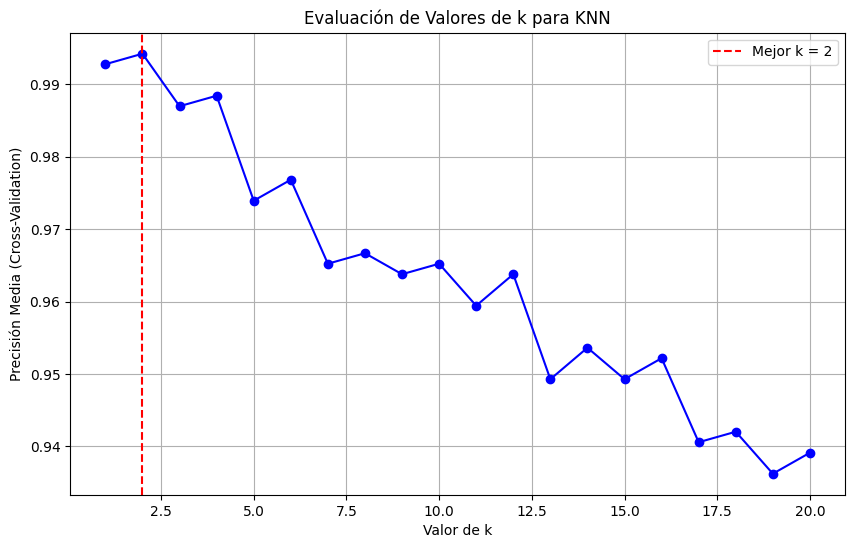

Precisión del modelo KNN con k óptimo: 0.9864864864864865


In [14]:
# Definir los valores de k a probar en la búsqueda en cuadrícula
valores_k = list(range(1, 21))  # Prueba k desde 1 hasta 20

# Crear un diccionario de parámetros para la búsqueda en cuadrícula
parametros = {'n_neighbors': valores_k}

# Instanciar el modelo KNN
knn_model = KNeighborsClassifier()

# Realizar la búsqueda en cuadrícula con validación cruzada (5-folds)
grid_search = GridSearchCV(knn_model, parametros, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los resultados de la búsqueda en cuadrícula
resultados_grid = grid_search.cv_results_
mejores_k = grid_search.best_params_['n_neighbors']

# Graficar cómo varía la precisión con diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(valores_k, resultados_grid['mean_test_score'], marker='o', linestyle='-', color='b')
plt.xlabel('Valor de k')
plt.ylabel('Precisión Media (Cross-Validation)')
plt.title('Evaluación de Valores de k para KNN')
plt.grid(True)

# Resaltar el valor óptimo de k
plt.axvline(x=mejores_k, color='r', linestyle='--', label=f'Mejor k = {mejores_k}')
plt.legend()
plt.show()

# Entrenar un modelo de KNN con el valor óptimo de k
modelo_knn_optimo = KNeighborsClassifier(n_neighbors=mejores_k)
modelo_knn_optimo.fit(X_train, y_train)

# Realizar predicciones con el modelo óptimo
y_pred_knn_optimo = modelo_knn_optimo.predict(X_test)

# Calcular la precisión del modelo óptimo en los datos de prueba
precision_knn_optimo = accuracy_score(y_test, y_pred_knn_optimo)
print(f"Precisión del modelo KNN con k óptimo: {precision_knn_optimo}")

**PASO 11:** Halle métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro max_depth se optimizó. ¿Qué puede concluir?

In [15]:
# Calcular las predicciones con el modelo KNN óptimo
y_pred_knn_optimo = modelo_knn_optimo.predict(X_test)

# Calcular la precisión
precision = precision_score(y_test, y_pred_knn_optimo)

# Calcular el recall
recall = recall_score(y_test, y_pred_knn_optimo)

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred_knn_optimo)

print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precisión: 0.972972972972973
Recall: 1.0
F1-Score: 0.9863013698630138


***Conclusión:*** 
- Con respecto al Árbol de Decisión se obtiene una precisión perfecta de 1.0, lo que significa que no tiene falsos positivos en sus predicciones, mientras que KNN tiene una precisión ligeramente inferior de 0.9412. No obstante, al graficar las variables de importancia la variable '***NUMERO DE DIAS POST BIOPSIA...***' es la variable con mayor importancia en el modelo (**valor 1**), por lo que, sería recomendable retirarla del modelo ya que interfiere con la predicción. Esta variable, podría usarse en un modelo diferenciado o aparte ya que mantiene una alta correlación con la variable objetivo (***HOSPITALIZACION***).
- En términos de recall, ambos modelos obtienen un valor perfecto de 1, lo que indica que no tienen falsos negativos, es decir, identifican correctamente todos los casos positivos.
- En cuanto al F1-Score, que es una métrica que combina precisión y recall, el Árbol de Decisión también obtiene un puntaje perfecto de 1, mientras que KNN obtiene un puntaje de 0.9697, que es ligeramente inferior.
- La exactitud es alta en ambos modelos, con 1.0 para el Árbol de Decisión y 0.9696 para KNN.

En general, ambos resultan ser buenos modelos de clasificación, en específico para esta base de datos (predicción de Hospitalización), sin embargo, se debe realizar unalimpieza mas exhaustiva. Ello, porque hay una fuerte correlación de una variable, lo cual afecta al modelo en si. 